<a href="https://colab.research.google.com/github/annshita/IoT-Anomaly-Detection-PCA/blob/main/PCA_iot23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
data = pd.read_csv('cleaned_data_2.csv')

In [ ]:
data.shape

(48003, 25)

In [ ]:
data['label'] = data['label'].apply(lambda x: 1 if x == 'Benign' else -1)

In [ ]:
X = data.drop(columns=['label'])
y = data['label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train_scaled)
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

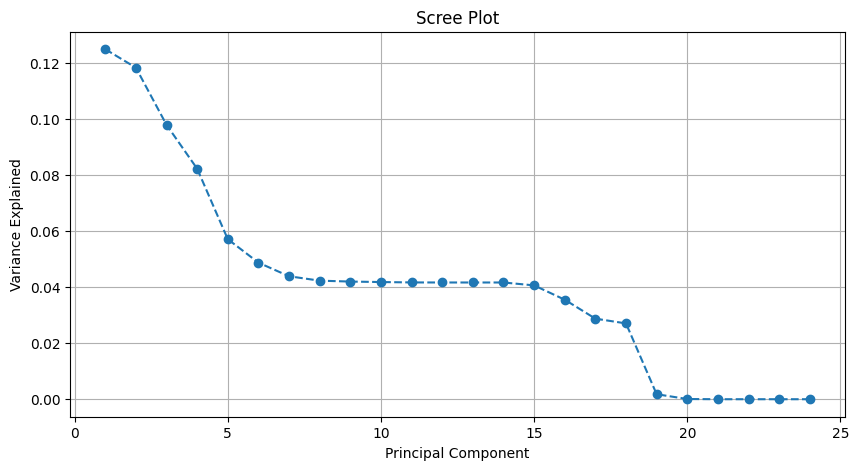

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('Scree Plot')
plt.grid()
plt.show()

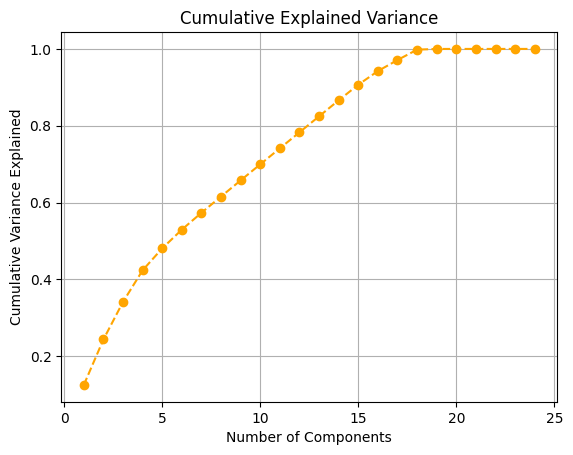

In [ ]:
# Cumulative explained variance plot
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='orange')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')
plt.title('Cumulative Explained Variance')
plt.grid()
plt.show()

In [ ]:
variance_threshold = 0.90
n_components = np.argmax(cumulative_variance >= variance_threshold) + 1
print(f"Number of components to retain {variance_threshold*100}% variance: {n_components}")

Number of components to retain 90.0% variance: 15


In [ ]:
pca = PCA(n_components=15)
X_reduced_train = pca.fit_transform(X_train_scaled)
print(f"Shape of reduced data: {X_reduced_train.shape}")

Shape of reduced data: (38402, 15)


In [ ]:
pca = PCA(n_components=15)
X_reduced_test = pca.fit_transform(X_test_scaled)
print(f"Shape of reduced data: {X_reduced_test.shape}")

Shape of reduced data: (9601, 15)


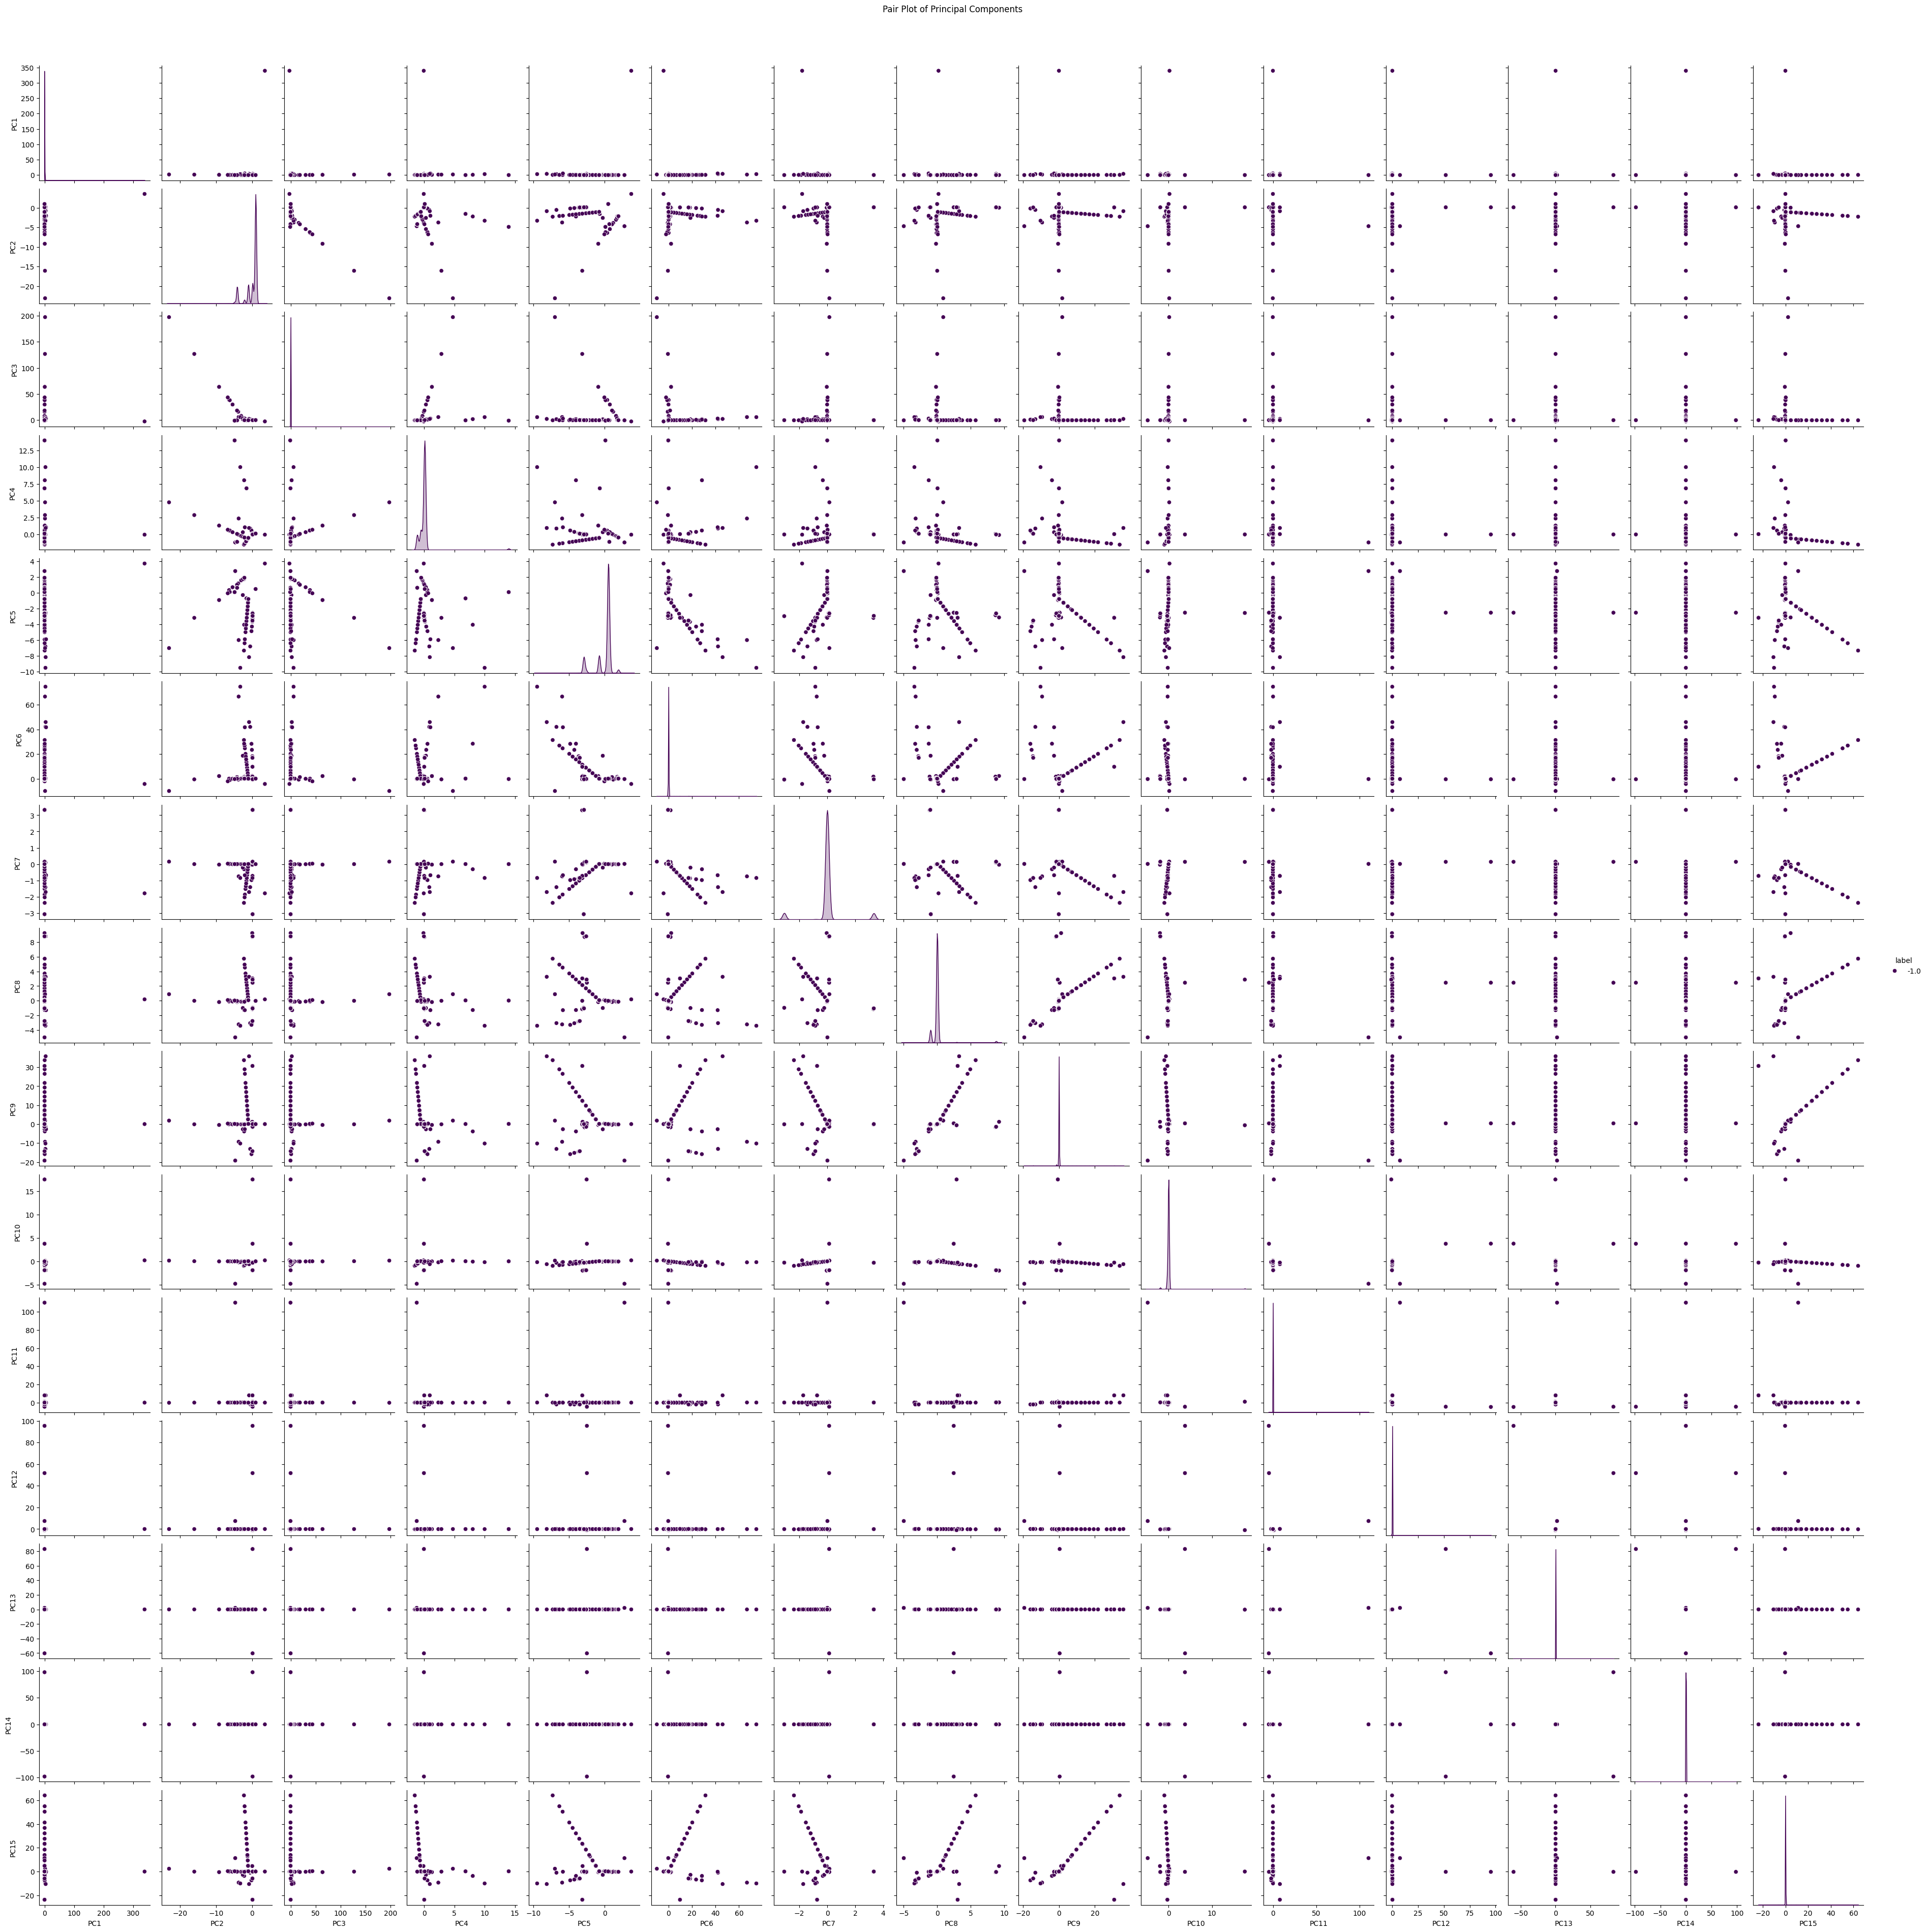

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
pca_df = pd.DataFrame(X_reduced_train, columns=[f'PC{i+1}' for i in range(X_reduced_train.shape[1])])
pca_df['label'] = y_train
sns.pairplot(pca_df, hue='label', palette='viridis', diag_kind='kde')
plt.suptitle('Pair Plot of Principal Components', y=1.02)
plt.show()


In [ ]:
import numpy as np
from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
ocsvm = OneClassSVM(kernel='rbf', gamma='auto', nu=0.1)
ocsvm.fit(X_reduced_train)
y_pred = ocsvm.predict(X_reduced_test)

In [ ]:
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Accuracy: {accuracy:.2f}")

Precision: 0.49
Recall: 0.50
F1 Score: 0.50
Accuracy: 0.50


Mean Squared Error: 1.9865
AUC-ROC Score: 0.4908


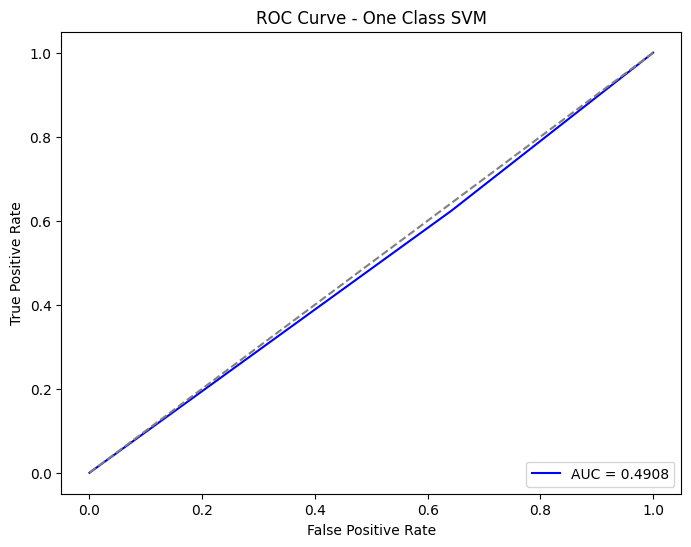

In [ ]:
from sklearn.metrics import mean_squared_error, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")
auc_score = roc_auc_score(y_test, y_pred)
print(f"AUC-ROC Score: {auc_score:.4f}")
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"AUC = {auc_score:.4f}")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - One Class SVM")
plt.legend(loc="lower right")
plt.show()

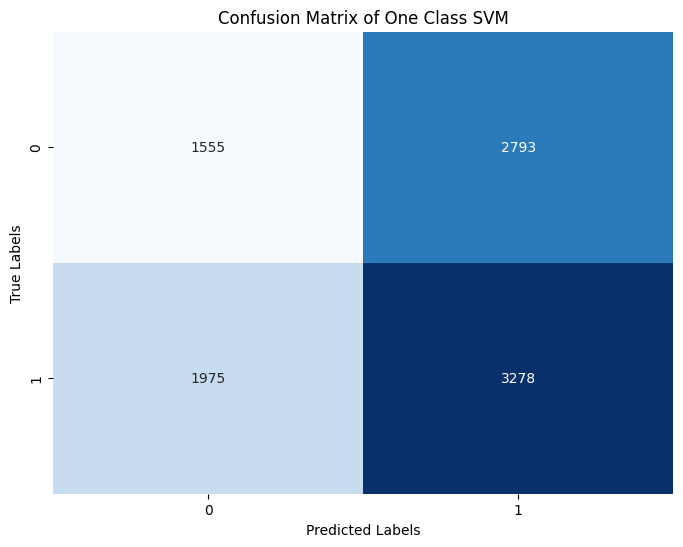

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix of One Class SVM")
plt.show()


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42, max_depth=10, min_samples_split=5, ccp_alpha=0.01)
dt_model.fit(X_reduced_train, y_train)
y_pred_dt = dt_model.predict(X_reduced_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred_dt)
precision = precision_score(y_test, y_pred_dt, average='weighted')
recall = recall_score(y_test, y_pred_dt, average='weighted')
f1 = f1_score(y_test, y_pred_dt, average='weighted')
print("Decision Tree Performance:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Decision Tree Performance:
Accuracy: 0.64
Precision: 0.73
Recall: 0.64
F1 Score: 0.57


Mean Squared Error: 1.9865
AUC-ROC Score: 0.4908


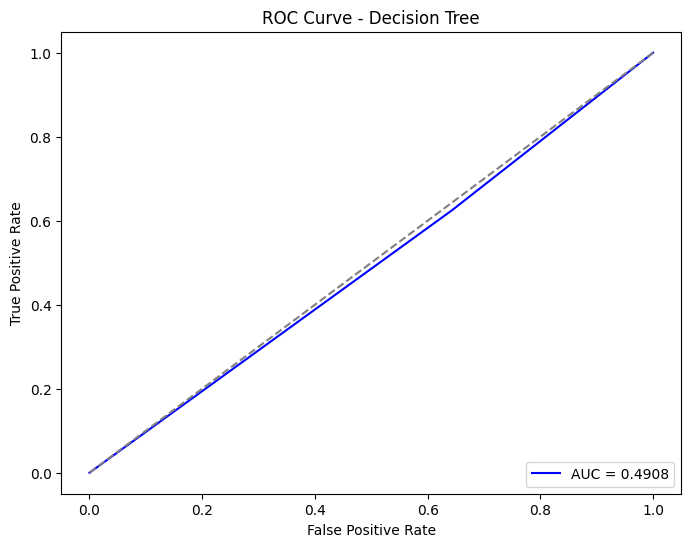

In [ ]:
from sklearn.metrics import mean_squared_error, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")
auc_score = roc_auc_score(y_test, y_pred)
print(f"AUC-ROC Score: {auc_score:.4f}")
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"AUC = {auc_score:.4f}")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Decision Tree")
plt.legend(loc="lower right")
plt.show()

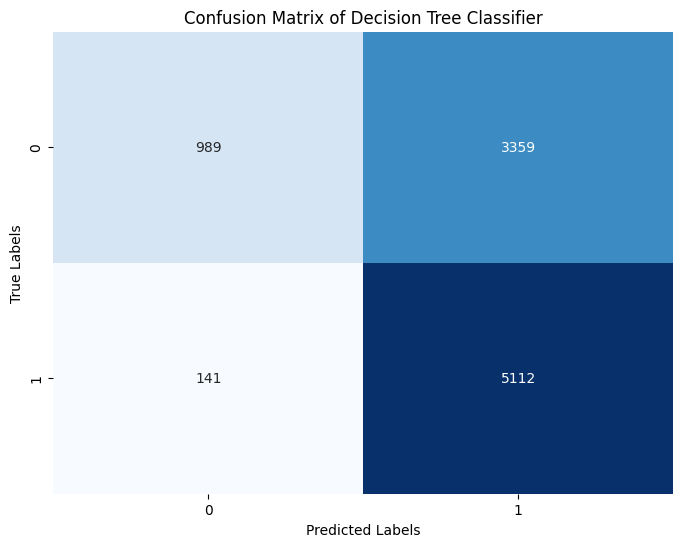

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix of Decision Tree Classifier")
plt.show()


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=2)
model.fit(X_reduced_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [ ]:
y_pred_knn = model.predict(X_reduced_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred_knn)
precision = precision_score(y_test, y_pred_knn, average='weighted')
recall = recall_score(y_test, y_pred_knn, average='weighted')
f1 = f1_score(y_test, y_pred_knn, average='weighted')
print("KNN:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

KNN:
Accuracy: 0.59
Precision: 0.78
Recall: 0.59
F1 Score: 0.53


Mean Squared Error: 1.6507
AUC-ROC Score: 0.6228


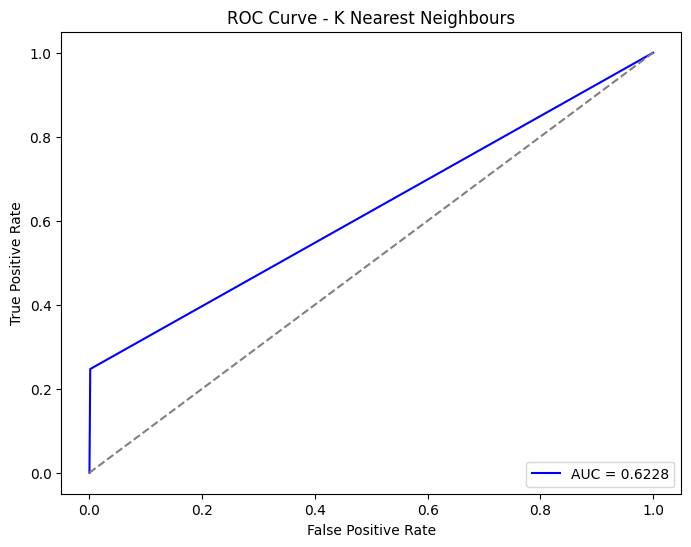

In [ ]:
from sklearn.metrics import mean_squared_error, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
mse = mean_squared_error(y_test, y_pred_knn)
print(f"Mean Squared Error: {mse:.4f}")
auc_score = roc_auc_score(y_test, y_pred_knn)
print(f"AUC-ROC Score: {auc_score:.4f}")
fpr, tpr, thresholds = roc_curve(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"AUC = {auc_score:.4f}")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - K Nearest Neighbours")
plt.legend(loc="lower right")
plt.show()

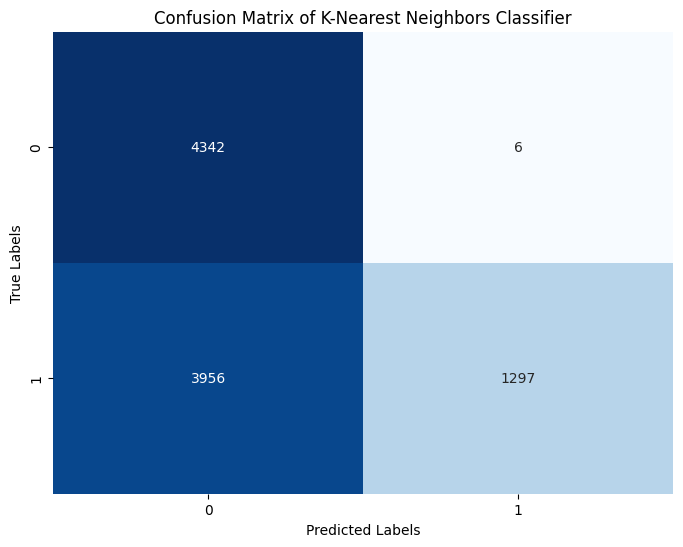

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix of K-Nearest Neighbors Classifier")
plt.show()


In [ ]:
from sklearn.ensemble import IsolationForest
model = IsolationForest(n_estimators=200, random_state=42, contamination=0.1)
model.fit(X_reduced_train)

IsolationForest(contamination=0.1, n_estimators=200, random_state=42)

In [ ]:
y_pred_isofor=model.predict(X_reduced_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred_isofor)
precision = precision_score(y_test, y_pred_isofor, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred_isofor, average='weighted')
f1 = f1_score(y_test, y_pred_isofor, average='weighted')
print("Isolation Forest:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Isolation Forest:
Accuracy: 0.45
Precision: 0.21
Recall: 0.45
F1 Score: 0.28


Mean Squared Error: 2.1885
AUC-ROC Score: 0.5000


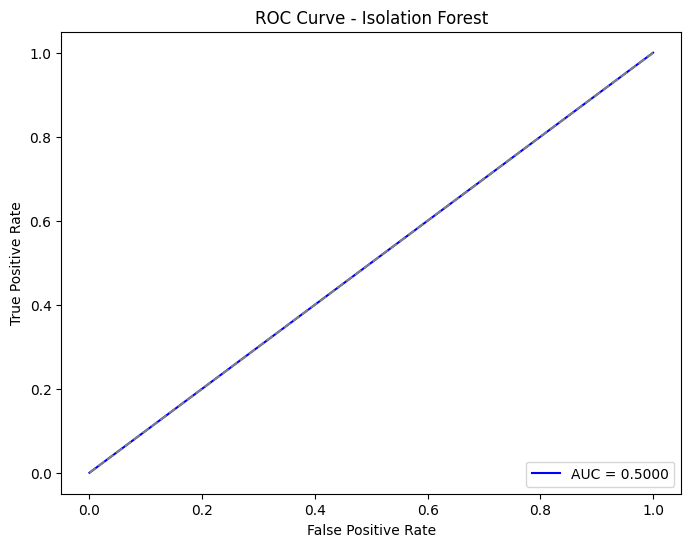

In [ ]:
from sklearn.metrics import mean_squared_error, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
mse = mean_squared_error(y_test, y_pred_isofor)
print(f"Mean Squared Error: {mse:.4f}")
auc_score = roc_auc_score(y_test, y_pred_isofor)
print(f"AUC-ROC Score: {auc_score:.4f}")
fpr, tpr, thresholds = roc_curve(y_test, y_pred_isofor)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"AUC = {auc_score:.4f}")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Isolation Forest")
plt.legend(loc="lower right")
plt.show()

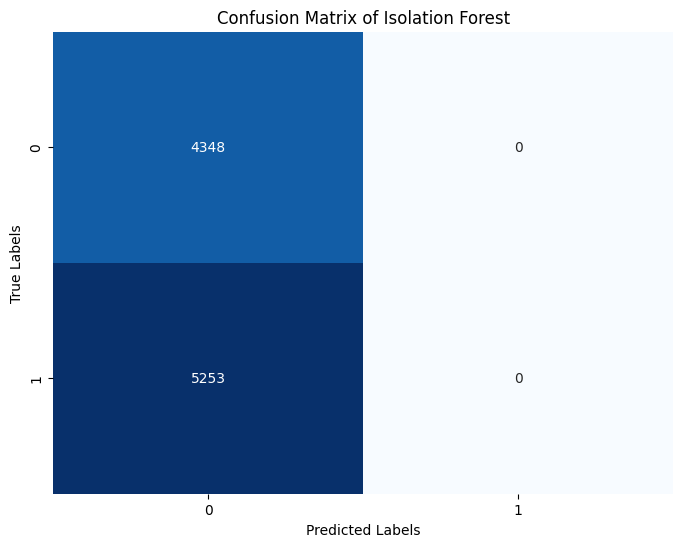

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_isofor)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix of Isolation Forest")
plt.show()


In [ ]:
from sklearn.neighbors import LocalOutlierFactor
import numpy as np
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred_lof = lof.fit_predict(X_reduced_test)

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report
precision = precision_score(y_test, y_pred_lof, pos_label=-1)
recall = recall_score(y_test, y_pred_lof, pos_label=-1)
f1 = f1_score(y_test, y_pred_lof, pos_label=-1)
accuracy = accuracy_score(y_test, y_pred_lof)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred_lof))


Precision: 0.3958333333333333
Recall: 0.08739650413983441
F1 Score: 0.14318010550113036
Accuracy: 0.5262993438183523

Classification Report:
               precision    recall  f1-score   support

          -1       0.40      0.09      0.14      4348
           1       0.54      0.89      0.67      5253

    accuracy                           0.53      9601
   macro avg       0.47      0.49      0.41      9601
weighted avg       0.48      0.53      0.43      9601



Mean Squared Error: 1.8948
AUC-ROC Score: 0.4885


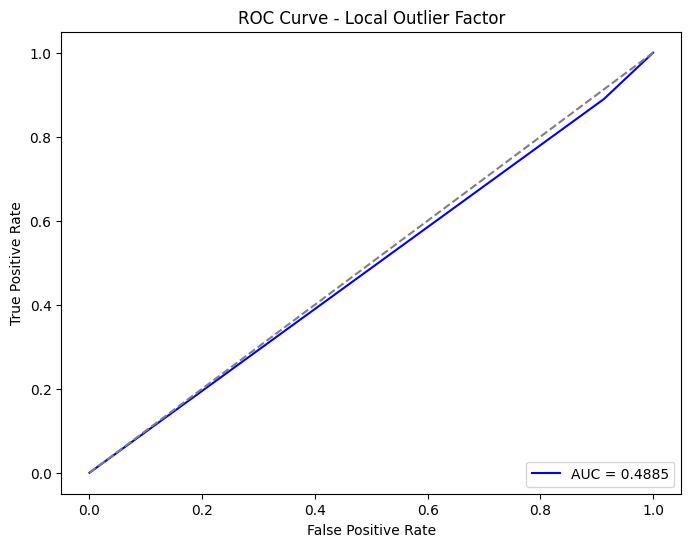

In [ ]:
from sklearn.metrics import mean_squared_error, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
mse = mean_squared_error(y_test, y_pred_lof)
print(f"Mean Squared Error: {mse:.4f}")
auc_score = roc_auc_score(y_test, y_pred_lof)
print(f"AUC-ROC Score: {auc_score:.4f}")
fpr, tpr, thresholds = roc_curve(y_test, y_pred_lof)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"AUC = {auc_score:.4f}")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Local Outlier Factor")
plt.legend(loc="lower right")
plt.show()

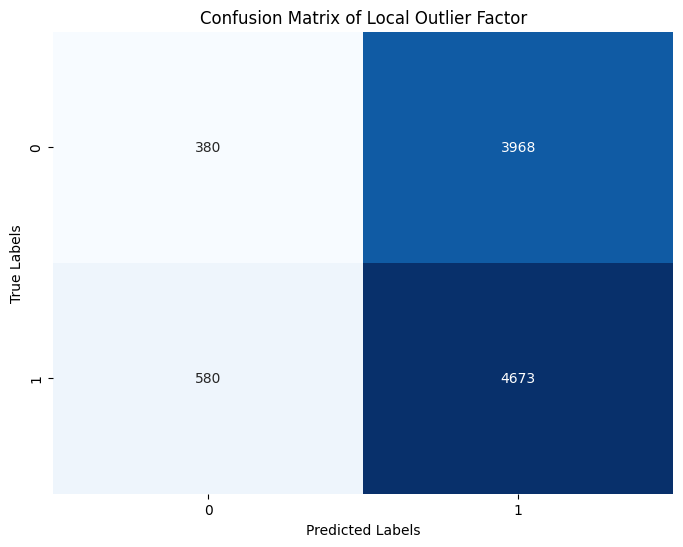

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_lof)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix of Local Outlier Factor")
plt.show()